<a href="https://colab.research.google.com/github/empios/175IC-machine-learning/blob/main/Zadanie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wynik regresji: 0.7836
średnia wynosi: 4181.19
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          1.32e-305
Time:                        15:00:34   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

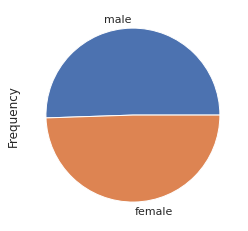

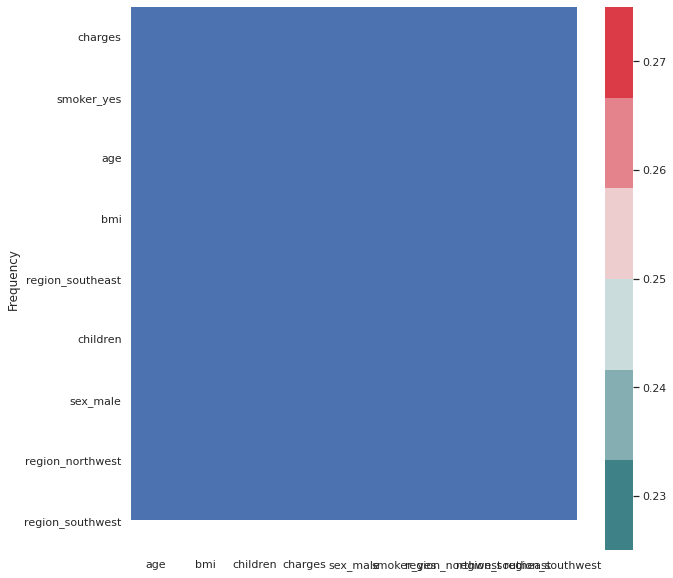

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import statsmodels.api as sm
import sys

import warnings
warnings.filterwarnings("ignore")



np.random.seed(42)

df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df.drop_duplicates()
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')


df_dummies = pd.get_dummies(df,drop_first=True)
corr = df_dummies.corr()

sns.set(style='white')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr,mask=mask, cmap=cmap,vmax=0.25,vmin=0.25)

df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

output = df_dummies['charges']
input = df_dummies.drop(columns='charges')

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)

regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
r2=regressor.score(x_test,y_test)
print(f'Wynik regresji: {regressor.score(x_test,y_test):.4f}')

y_pred = regressor.predict(x_test)
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true':y_true,'y_pred':y_pred})
predictions['error'] = predictions.y_true - predictions.y_pred
predictions.error.plot(kind='hist',bins=30)

srednia = sklearn.metrics.mean_absolute_error(y_true,y_pred)
print(f'średnia wynosi: {srednia:.2f}')

x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train,exog=x_train_ols).fit()
przewidywania = ['const'] + list(x_train.columns)

print(ols.summary(xname= przewidywania))

df_without_cols = df_dummies.drop(columns=['children','sex_male','region_northwest','region_southeast','region_southeast'])
df_without_cols.head()

output = df_without_cols['charges']
input = df_without_cols.drop(columns='charges')
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
print(f'Wynik ponownej regresji : {regressor.score(x_test,y_test)}')
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
print(f'Średnia ponowna:  {sklearn.metrics.mean_absolute_error(y_true,y_pred)}')
raw_size = sys.getsizeof(df_dummies)
cols_size = sys.getsizeof(df_without_cols)
print(f'Różnica po usunięciu zbędnych danych wynosi: {100-(cols_size/raw_size*100):.4f} procent')
print(f'Różnica regresji: {(r2-regressor.score(x_test,y_test)):.4f}')
print(f'Różnica średniej: {(srednia-sklearn.metrics.mean_absolute_error(y_true,y_pred)):.4f}')